# Lead Scoring Case Study

### STEP 1
- Importing the required libraries
- Read the dataset
- Basic checks on dataframe

In [305]:
import warnings
warnings.filterwarnings('ignore')

In [306]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [307]:
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import precision_recall_curve

In [308]:
leads = pd.read_csv('Leads.csv')
leads.shape

(9240, 37)

In [309]:
pd.set_option('max_columns', None)
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [310]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

### STEP 2 - Data Preparation
- Processing DataFrame
- Perform EDA
- Removing unwanted data/ columns
- Imputing values

In [311]:
# Renaming the columns as per standards
leads.columns = ['Prospect_ID',
                'Lead_Number',
                'Lead_Origin',
                'Lead_Source',
                'Email_contact',
                'Phone_contact',
                'Converted',
                'TotalVisits',
                'Time_Spent_Website',
                'Page_Views_Per_Visit',
                'Last_Activity',
                'Country',
                'Specialization',
                'Channel',
                'Occupation',
                'Preference',
                'Search',
                'Magazine',
                'Newspaper_Article',
                'X_Education_Forums',
                'Newspaper',
                'Digital_Advertisement',
                'Through_Recommendations',
                'Future_communication_1',
                'Tags',
                'Lead_Quality',
                'Future_communication_2',
                'Future_communication_3',
                'Lead_Profile',
                'City',
                'Asym_Activity_Index',
                'Asym_Profile_Index',
                'Asym_Activity_Score',
                'Asym_Profile_Score',
                'Cheque_payment',
                'Copy_Mastering_Interview',
                'Last_Notable_Activity']

In [312]:
# Prospect_ID is a ID assigned to lead. It has no significance for modeling. Dropping it.
leads.drop('Prospect_ID', axis=1, inplace=True)

In [313]:
# Check for nulls
perc_missing = leads.isna().sum() * 100 / leads.shape[0]
perc_missing

Lead_Number                  0.000000
Lead_Origin                  0.000000
Lead_Source                  0.389610
Email_contact                0.000000
Phone_contact                0.000000
Converted                    0.000000
TotalVisits                  1.482684
Time_Spent_Website           0.000000
Page_Views_Per_Visit         1.482684
Last_Activity                1.114719
Country                     26.634199
Specialization              15.562771
Channel                     23.885281
Occupation                  29.112554
Preference                  29.318182
Search                       0.000000
Magazine                     0.000000
Newspaper_Article            0.000000
X_Education_Forums           0.000000
Newspaper                    0.000000
Digital_Advertisement        0.000000
Through_Recommendations      0.000000
Future_communication_1       0.000000
Tags                        36.287879
Lead_Quality                51.590909
Future_communication_2       0.000000
Future_commu

#### There are many columns where the missing values constitute > 30%. The initial thought is to drop such field. However it is noticed that fields like 'TAGS', 'LEAD QUALITY' may have an impact on the target variable. Hence, imputing 'Unknown' for all the null values in categorical variables. Also, there are placed where the valus is NaN or Select. Imputing 'Unknown' for such cases also.
#### In case such variables are selected for modelling, we can handle 'Unknown' during creation of the Dummy Variables.
#### Before moving to the non numeric variables, lets see tht ones that have a numeric definition

In [314]:
# 'Lead Number' is defined as numeric but is actually categorical variable. Checking for different values it can have.
leads['Lead_Number'].value_counts()

608255    1
596233    1
656682    1
592824    1
652580    1
         ..
631489    1
600768    1
598556    1
616923    1
655360    1
Name: Lead_Number, Length: 9240, dtype: int64

In [315]:
# As can be seen each lead has a new 'Lead Number' and not even a single lead number is associated to more than one 
# lead. Hence, this field is of no relevance for modeling. Dropping it.
leads.drop('Lead_Number', axis=1, inplace=True)
leads.shape

(9240, 35)

In [316]:
# Examining the target variable for imbalance; which again is a categorical variable.
leads.Converted.value_counts(normalize=True)

0    0.61461
1    0.38539
Name: Converted, dtype: float64

This is a good data with no or very little imbalance. No handling required in terms of imbalance.

In [317]:
# Next numeric variable
print (leads.TotalVisits.isna().sum())
print (leads[leads.TotalVisits.isna()]['Converted'].sum())

137
100


In [318]:
# It is noticed that out of 137 cases where TotalVisits was missing, 100 got converted. Hence, dropping/ ignoring them
# may not be a good idea. Imputing them to the value that has highest turn around.
leads[leads.Converted == 1].groupby('TotalVisits')['TotalVisits'].count().sort_values(ascending=False).head()

TotalVisits
0.0    916
2.0    537
3.0    486
4.0    448
5.0    316
Name: TotalVisits, dtype: int64

In [319]:
# Looks like people who never visited where most probable to turn up. Imputing the missing values to next highest, which is 2.
leads.TotalVisits.fillna(2, inplace=True)
leads.TotalVisits.isna().sum()

0

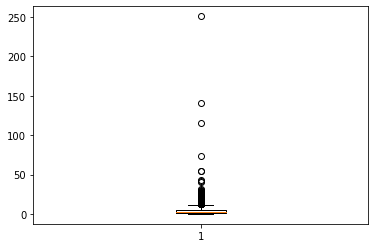

In [320]:
# Checking box plot for the variable to identify outliers
plt.boxplot(leads.TotalVisits)
plt.show()

In [321]:
# This is a real high number and can impact the model. Dropping these records don't looks like a good idea and hence
# Capping all the higher values to 50.
leads.loc[leads.TotalVisits > 50, 'TotalVisits'] = 50

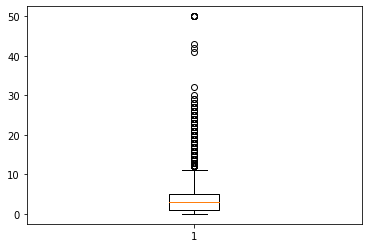

In [322]:
# Checking the box plot again.
plt.boxplot(leads.TotalVisits)
plt.show()

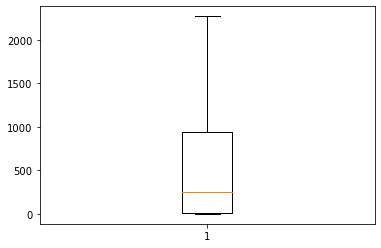

In [323]:
# Checking the next numeric variable
plt.boxplot(leads['Time_Spent_Website'])
plt.show()

In [324]:
# Checking the next numeric variable
print (leads['Page_Views_Per_Visit'].isna().sum())
print (leads[leads['Page_Views_Per_Visit'].isna()]['Converted'].sum())

137
100


In [325]:
# Taking the same strategy as for TotalVisits
leads[leads.Converted == 1].groupby('Page_Views_Per_Visit')['Page_Views_Per_Visit'].count().sort_values(ascending=False).head()

Page_Views_Per_Visit
0.0    916
2.0    592
3.0    453
4.0    357
5.0    208
Name: Page_Views_Per_Visit, dtype: int64

In [326]:
# Looks like people who never visited where most probable to turn up. Imputing the missing values to next highest, which is 2.
leads.Page_Views_Per_Visit.fillna(2, inplace=True)
leads.Page_Views_Per_Visit.isna().sum()

0

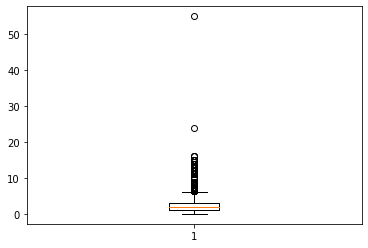

In [327]:
# Checking box plot for the variable to identify outliers
plt.boxplot(leads.Page_Views_Per_Visit)
plt.show()

In [328]:
# This is fine and no need to handle the outlier as count of visit is not very high.

In [329]:
# Checking the next set of numeric columns
print (leads['Asym_Activity_Score'].isna().sum())
print (leads['Asym_Profile_Score'].isna().sum())

4218
4218


In [330]:
# Imputing approx 45% data is not justifiable. Dropping these columns.
leads.drop(['Asym_Activity_Score', 'Asym_Profile_Score'], axis=1, inplace=True)
leads.shape

(9240, 33)

In [331]:
leads.describe()

,Converted,TotalVisits,Time_Spent_Website,Page_Views_Per_Visit
count,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.385390,3.381602,487.698268,2.357440
std,0.486714,3.677414,548.021466,2.145781
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,12.000000,1.000000
50%,0.000000,3.000000,248.000000,2.000000
75%,1.000000,5.000000,936.000000,3.000000
max,1.000000,50.000000,2272.000000,55.000000


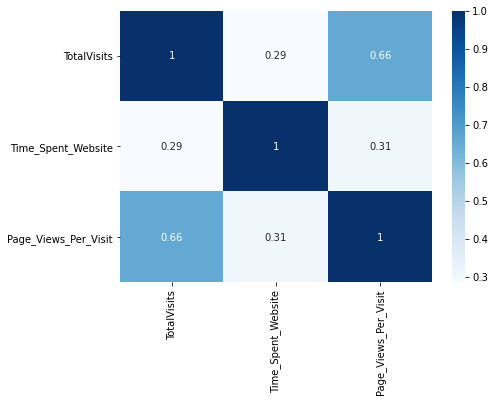

In [332]:
# As can be seen, leaving the target variable, there are only 3 numeric columns. Checking correlation between them.
plt.figure(figsize = (7,5))
temp_df = leads[['TotalVisits', 'Time_Spent_Website', 'Page_Views_Per_Visit']]
sns.heatmap(temp_df.corr(),cmap='Blues', annot = True)
plt.show()

##### From the above heatmap, it can be seen that there is a high correlation between TotalVisits and Page_Views_Per_Visit. Keeping both the columns for now but in the model, one of the field will be removed based on metrices. In case of manual decision required, TotalVisits seems to have more business significance upon Page_Views_Per_Visit

#### Now imputing 'Unknown' for Nulls, NaN and Select in all the categorical columns

In [333]:
leads.isna().sum()

Lead_Origin                    0
Lead_Source                   36
Email_contact                  0
Phone_contact                  0
Converted                      0
TotalVisits                    0
Time_Spent_Website             0
Page_Views_Per_Visit           0
Last_Activity                103
Country                     2461
Specialization              1438
Channel                     2207
Occupation                  2690
Preference                  2709
Search                         0
Magazine                       0
Newspaper_Article              0
X_Education_Forums             0
Newspaper                      0
Digital_Advertisement          0
Through_Recommendations        0
Future_communication_1         0
Tags                        3353
Lead_Quality                4767
Future_communication_2         0
Future_communication_3         0
Lead_Profile                2709
City                        1420
Asym_Activity_Index         4218
Asym_Profile_Index          4218
Cheque_pay

In [334]:
# replace nulls, NaN and Select with Unknown
leads.fillna('NaN', inplace=True)
leads.replace(['Select', 'NaN'], 'Unknown', inplace=True)

#### Verifying individual columns for possible values and understanding their significance

In [335]:
# checking distribution of 'Lead Origin'
leads['Lead_Origin'].value_counts()

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead_Origin, dtype: int64

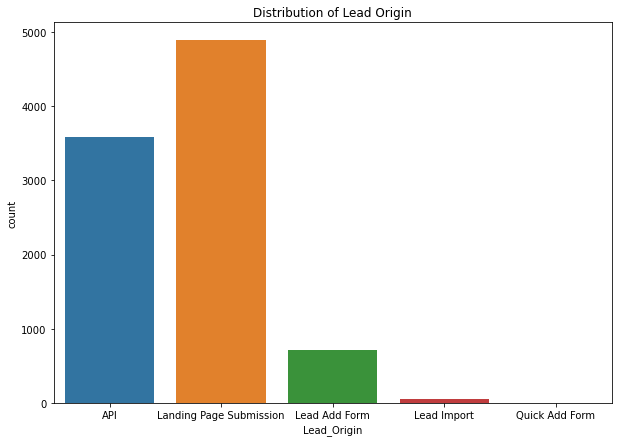

In [336]:
plt.figure(figsize = (10,7))
sns.countplot(leads.Lead_Origin)
plt.title('Distribution of Lead Origin')
plt.show()

In [337]:
# clubbing the values with very less percentage in one group as 'Others'
leads.loc[~((leads['Lead_Origin'] == 'Landing Page Submission') | 
            (leads['Lead_Origin'] == 'API')),'Lead_Origin'] = 'Others'
leads['Lead_Origin'].value_counts()

Landing Page Submission    4886
API                        3580
Others                      774
Name: Lead_Origin, dtype: int64

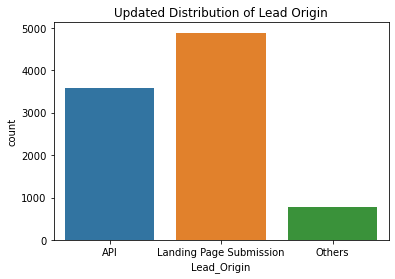

In [338]:
sns.countplot(leads['Lead_Origin'])
plt.title('Updated Distribution of Lead Origin')
plt.show()

In [339]:
# analysing 'Lead Source' distribution and clubbing all the values with less count as others
leads['Lead_Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
Unknown                36
bing                    6
google                  5
Click2call              4
Social Media            2
Press_Release           2
Live Chat               2
blog                    1
NC_EDM                  1
welearnblog_Home        1
Pay per Click Ads       1
youtubechannel          1
WeLearn                 1
testone                 1
Name: Lead_Source, dtype: int64

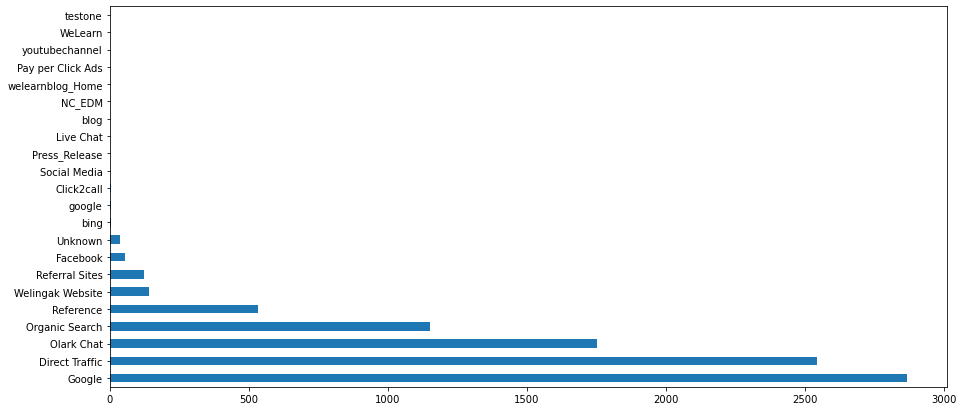

In [340]:
plt.figure(figsize = (15,7))  
leads['Lead_Source'].value_counts().plot.barh()
plt.show()

In [341]:
# again clubbing the values with very low occurance as 'Others'. Also clubbed google and Google to 1 unit as Google
leads.loc[(leads['Lead_Source'] == 'google'), 'Lead_Source'] = 'Google'
leads.loc[~((leads['Lead_Source'] == 'Google') | 
           (leads['Lead_Source'] == 'Direct Traffic') | 
           (leads['Lead_Source'] == 'Olark Chat') |
           (leads['Lead_Source'] == 'Organic Search')), 'Lead_Source'] = 'Others'
leads['Lead_Source'].value_counts()

Google            2873
Direct Traffic    2543
Olark Chat        1755
Organic Search    1154
Others             915
Name: Lead_Source, dtype: int64

In [342]:
# analysing distribution of 'Do Not Email'.
leads['Email_contact'].value_counts(normalize=True)

No     0.920563
Yes    0.079437
Name: Email_contact, dtype: float64

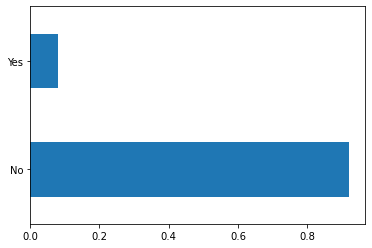

In [343]:
# There is a high class imbalance in the variable. Better to drop it. Marking for it.
leads['Email_contact'].value_counts(normalize=True).plot.barh()
plt.show()

In [344]:
# Checking distribution for 'Do Not Call'. Again a high imbalance. Marking to drop.
leads.Phone_contact.value_counts()

No     9238
Yes       2
Name: Phone_contact, dtype: int64

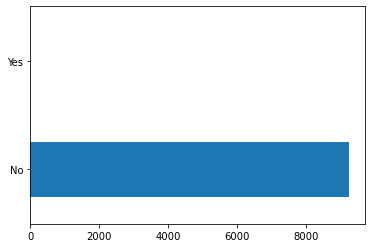

In [345]:
leads.Phone_contact.value_counts().plot.barh()
plt.show()

In [346]:
# Checking distribution for 'Last Activity' & consolidating the less present values as 'Others'
leads['Last_Activity'].value_counts(normalize=True)

Email Opened                    0.371970
SMS Sent                        0.297078
Olark Chat Conversation         0.105303
Page Visited on Website         0.069264
Converted to Lead               0.046320
Email Bounced                   0.035281
Email Link Clicked              0.028896
Form Submitted on Website       0.012554
Unknown                         0.011147
Unreachable                     0.010065
Unsubscribed                    0.006602
Had a Phone Conversation        0.003247
Approached upfront              0.000974
View in browser link Clicked    0.000649
Email Marked Spam               0.000216
Email Received                  0.000216
Visited Booth in Tradeshow      0.000108
Resubscribed to emails          0.000108
Name: Last_Activity, dtype: float64

In [347]:
leads.loc[~((leads['Last_Activity'] == 'Email Opened') |
            (leads['Last_Activity'] == 'SMS Sent') |
            (leads['Last_Activity'] == 'Olark Chat Conversation') |
            (leads['Last_Activity'] == 'Page Visited on Website') |
            (leads['Last_Activity'] == 'Converted to Lead') |
            (leads['Last_Activity'] == 'Email Bounced') |
            (leads['Last_Activity'] == 'Email Link Clicked')), 'Last_Activity'] = 'Others'
leads['Last_Activity'].value_counts(normalize=True)

Email Opened               0.371970
SMS Sent                   0.297078
Olark Chat Conversation    0.105303
Page Visited on Website    0.069264
Converted to Lead          0.046320
Others                     0.045887
Email Bounced              0.035281
Email Link Clicked         0.028896
Name: Last_Activity, dtype: float64

In [348]:
# Anslyzing distribution of Country
leads['Country'].value_counts()

India                   6492
Unknown                 2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Canada                     4
Germany                    4
Kuwait                     4
Sweden                     3
Italy                      2
Uganda                     2
Bangladesh                 2
Belgium                    2
Philippines                2
Asia/Pacific Region        2
Ghana                      2
China                      2
Netherlands                2
Malaysia                   1
Denmark                    1
Indonesia                  1
Switzerland                1
Tanzania                   1
Liberia       

In [349]:
# Categorizing as India and Others
leads.loc[~(leads['Country'] == 'India'), 'Country'] = 'Others'
leads.Country.value_counts(normalize=True)

India     0.702597
Others    0.297403
Name: Country, dtype: float64

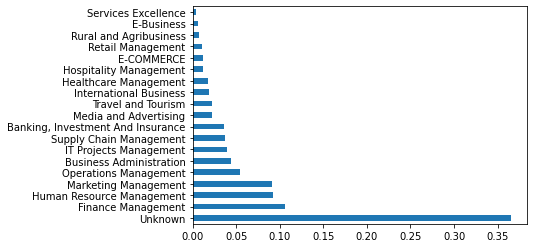

In [350]:
# Analyzing 'Specialization' for distribution. 
leads['Specialization'].value_counts(normalize=True).plot.barh()
plt.show()
# Since the maximum values are Unknown, marking the column to drop

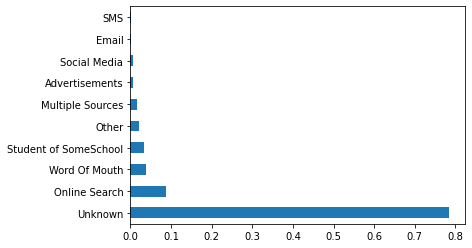

In [351]:
# Analyzing 'How did you hear about X Education' for distribution and in case unknowns are highest, marking to drop
leads['Channel'].value_counts(normalize=True).plot.barh()
plt.show()

In [352]:
# Analyzing the distribution for Occupation
leads.Occupation.value_counts(normalize=True)

Unemployed              0.606061
Unknown                 0.291126
Working Professional    0.076407
Student                 0.022727
Other                   0.001732
Housewife               0.001082
Businessman             0.000866
Name: Occupation, dtype: float64

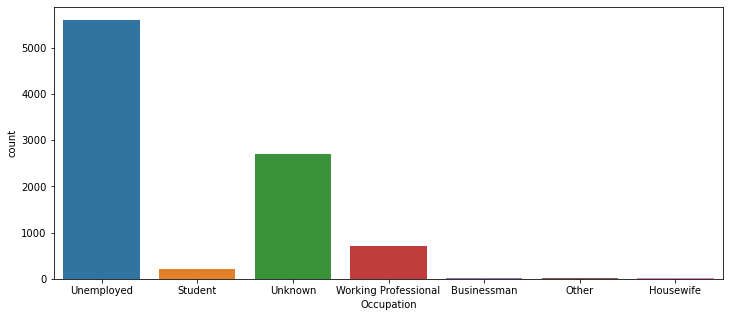

In [353]:
plt.figure(figsize = (12,5))
sns.countplot(leads.Occupation)
plt.show()

In [354]:
# Apart from unemployed the next big group is Unknown. Rest of the groups are very marginal. Hence, dividing the data
# as Unemployed and Others
leads.loc[~(leads['Occupation'] == 'Unemployed'), 'Occupation'] = 'Others'

In [355]:
# Checking the distribution for 'What matters most to you in choosing a course'
leads.Preference.value_counts(normalize=True)

Better Career Prospects      0.706494
Unknown                      0.293182
Flexibility & Convenience    0.000216
Other                        0.000108
Name: Preference, dtype: float64

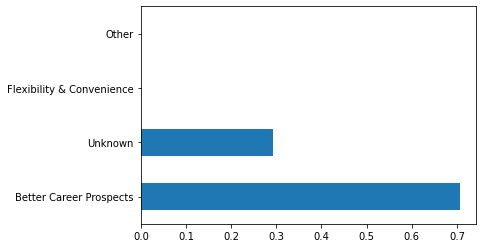

In [356]:
leads.Preference.value_counts(normalize=True).plot.barh()
plt.show()

In [357]:
# Based on the above distribution, dividing this column also in 2 parts - 'Better Career Prospects' & 'Others'
leads.loc[~(leads.Preference == 'Better Career Prospects'), 'Preference'] = 'Others'
leads.Preference.value_counts(normalize=True)

Better Career Prospects    0.706494
Others                     0.293506
Name: Preference, dtype: float64

No     0.998485
Yes    0.001515
Name: Search, dtype: float64


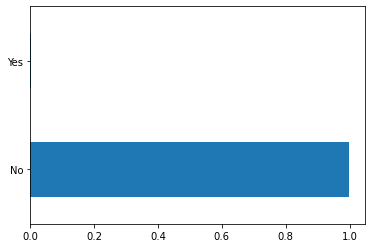

In [358]:
# Checking distribution for Search. Due to high imbalance, marking the column to be dropped
print (leads['Search'].value_counts(normalize=True))
leads['Search'].value_counts(normalize=True).plot.barh()
plt.show()

In [359]:
# Checking distribution for Magazine.
leads['Magazine'].value_counts(normalize=True)
# Marking it to be dropped as it has only 1 value.

No    1.0
Name: Magazine, dtype: float64

No     0.999784
Yes    0.000216
Name: Newspaper_Article, dtype: float64


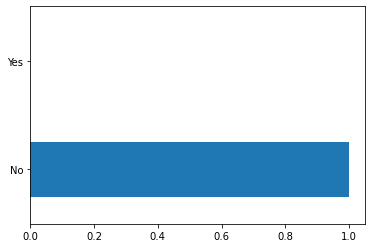

In [360]:
# Checking distribution for Newspaper_Article.
print (leads['Newspaper_Article'].value_counts(normalize=True))
leads['Newspaper_Article'].value_counts(normalize=True).plot.barh()
plt.show()
# Due to high class imbalance, marking this column to be dropped

No     0.999892
Yes    0.000108
Name: X_Education_Forums, dtype: float64


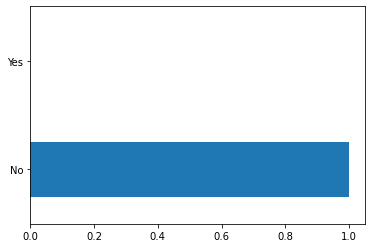

In [361]:
# Distribution of X_Education_Forums
print (leads['X_Education_Forums'].value_counts(normalize=True))
leads['X_Education_Forums'].value_counts(normalize=True).plot.barh()
plt.show()

No     0.999892
Yes    0.000108
Name: Newspaper, dtype: float64


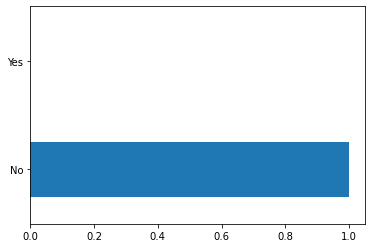

In [362]:
# Distribution of Newspaper
print (leads['Newspaper'].value_counts(normalize=True))
leads['Newspaper'].value_counts(normalize=True).plot.barh()
plt.show()

No     0.999567
Yes    0.000433
Name: Digital_Advertisement, dtype: float64


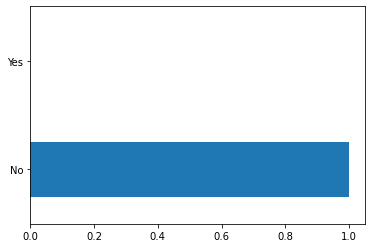

In [363]:
# Distribution of Digital Advertisment
print (leads['Digital_Advertisement'].value_counts(normalize=True))
leads['Digital_Advertisement'].value_counts(normalize=True).plot.barh()
plt.show()

No     0.999242
Yes    0.000758
Name: Through_Recommendations, dtype: float64


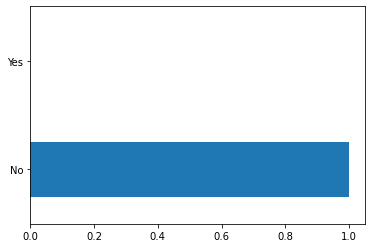

In [364]:
# Distribution of Through_Recommendations
print (leads['Through_Recommendations'].value_counts(normalize=True))
leads['Through_Recommendations'].value_counts(normalize=True).plot.barh()
plt.show()

In [365]:
# Distribution of Receive More Updates About Our Courses
leads.Future_communication_1.value_counts(normalize=True)

No    1.0
Name: Future_communication_1, dtype: float64

In [366]:
# Distribution of Tags
leads.Tags.value_counts()
# Since the majority of the data here is unknown, marking it to be dropped

Unknown                                              3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

Unknown              4767
Might be             1560
Not Sure             1092
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: Lead_Quality, dtype: int64


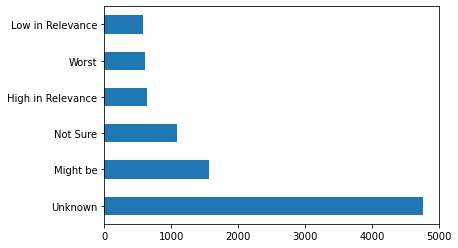

In [367]:
# Distribution of Lead Quality
print (leads.Lead_Quality.value_counts())
leads.Lead_Quality.value_counts().plot.barh()
plt.show()
# Since the majority of the data here is unknown, marking it to be dropped

In [368]:
# Distribution of Receive More Updates About Our Courses
leads.Future_communication_2.value_counts(normalize=True)

No    1.0
Name: Future_communication_2, dtype: float64

In [369]:
# Distribution of Get updates on DM Content
leads.Future_communication_3.value_counts(normalize=True)

No    1.0
Name: Future_communication_3, dtype: float64

In [370]:
# Distribution of Lead Profile
leads['Lead_Profile'].value_counts(normalize=True)
# Since the majority of the data here is unknown, marking it to be dropped

Unknown                        0.741883
Potential Lead                 0.174567
Other Leads                    0.052706
Student of SomeSchool          0.026082
Lateral Student                0.002597
Dual Specialization Student    0.002165
Name: Lead_Profile, dtype: float64

In [371]:
# Distribution of Lead Profile
leads['City'].value_counts()

Unknown                        3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [372]:
# Here again the unknowns are higher than the knowns. However for now, classifying the data as Mumbai Vs Others to see
# the field is relevant atall
leads.loc[~(leads.City == 'Mumbai'), 'City'] = 'Others'

Unknown      4218
02.Medium    3839
01.High       821
03.Low        362
Name: Asym_Activity_Index, dtype: int64


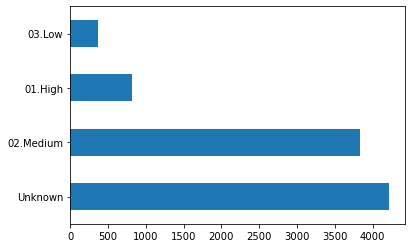

In [373]:
# Distribution of Asymmetrique Activity Index
print (leads['Asym_Activity_Index'].value_counts())
leads['Asym_Activity_Index'].value_counts().plot.barh()
plt.show()
# Marking the column to be deleted as most frequent value is 'Unknown'

Unknown      4218
02.Medium    2788
01.High      2203
03.Low         31
Name: Asym_Profile_Index, dtype: int64


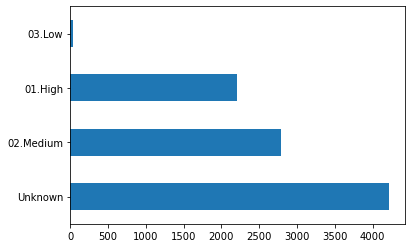

In [374]:
# Distribution of Asymmetrique Profile Index
print (leads.Asym_Profile_Index.value_counts())
leads.Asym_Profile_Index.value_counts().plot.barh()
plt.show()
# Marking the column to be deleted as most frequent value is unknown

In [375]:
# Distribution of 'I agree to pay the amount through cheque'
leads.Cheque_payment.value_counts(normalize=True)

No    1.0
Name: Cheque_payment, dtype: float64

No     0.687446
Yes    0.312554
Name: Copy_Mastering_Interview, dtype: float64


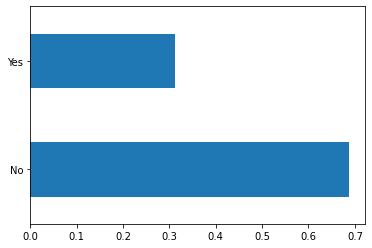

In [376]:
# Distribution of 'A free copy of Mastering The Interview'
print (leads.Copy_Mastering_Interview.value_counts(normalize=True))
leads.Copy_Mastering_Interview.value_counts(normalize=True).plot.barh()
plt.show()

In [377]:
# Distribution of Last Notable Activity
leads['Last_Notable_Activity'].value_counts(normalize=True)

Modified                        0.368723
Email Opened                    0.305952
SMS Sent                        0.235065
Page Visited on Website         0.034416
Olark Chat Conversation         0.019805
Email Link Clicked              0.018723
Email Bounced                   0.006494
Unsubscribed                    0.005087
Unreachable                     0.003463
Had a Phone Conversation        0.001515
Email Marked Spam               0.000216
Approached upfront              0.000108
Form Submitted on Website       0.000108
View in browser link Clicked    0.000108
Email Received                  0.000108
Resubscribed to emails          0.000108
Name: Last_Notable_Activity, dtype: float64

In [378]:
# Re-categorizing the values to group less used values as others
leads.loc[~((leads.Last_Notable_Activity == 'Modified') |
            (leads.Last_Notable_Activity == 'Email Opened') |
            (leads.Last_Notable_Activity == 'SMS Sent')), 'Last_Notable_Activity'] = 'Others'
leads['Last_Notable_Activity'].value_counts()

Modified        3407
Email Opened    2827
SMS Sent        2172
Others           834
Name: Last_Notable_Activity, dtype: int64

#### Based on the infrences drawn above, dropping the unwanted columns. Two type of columns are dropped altogether:-
- having high value of Nulls/ Unknowns
- Having high imbalance

In [379]:
leads.drop(['Email_contact', 
            'Phone_contact',
            'Specialization',
            'Channel',
            'Search',
            'Magazine',
            'Newspaper_Article',
            'X_Education_Forums',
            'Newspaper',
            'Digital_Advertisement',
            'Through_Recommendations',
            'Future_communication_1',
            'Tags',
            'Lead_Quality',
            'Future_communication_2',
            'Future_communication_3',
            'Lead_Profile',
            'Asym_Activity_Index',
            'Asym_Profile_Index',
            'Cheque_payment'
            ], axis=1, inplace=True)

In [380]:
leads.shape

(9240, 13)

In [381]:
leads.head()

,Lead_Origin,Lead_Source,Converted,TotalVisits,Time_Spent_Website,Page_Views_Per_Visit,Last_Activity,Country,Occupation,Preference,City,Copy_Mastering_Interview,Last_Notable_Activity
0,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,Better Career Prospects,Others,No,Modified
1,API,Organic Search,0,5.0,674,2.5,Email Opened,India,Unemployed,Better Career Prospects,Others,No,Email Opened
2,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,India,Others,Better Career Prospects,Mumbai,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Others,India,Unemployed,Better Career Prospects,Mumbai,No,Modified
4,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,India,Unemployed,Better Career Prospects,Mumbai,No,Modified


#### Now that the data correction is done, lets make it more appropiate for modelling. 
- Imputing 0's and 1's for Yes/ No variables
- Imputing integers starting 0 for variables having alpha data (will assign 0 to Others so that it is dropped while creating dummy variables)
- Creation of Dummy Variables

In [382]:
leads.Copy_Mastering_Interview = leads.Copy_Mastering_Interview.map({'Yes': 1, "No": 0})
leads.Lead_Origin = leads.Lead_Origin.map({'Others': 0, 'Landing Page Submission': 1, 'API': 2 })
leads.Lead_Source = leads.Lead_Source.map({'Others': 0, 'Google': 1, 'Direct Traffic': 2, 'Olark Chat': 3, 'Organic Search': 4 })
leads.Last_Activity = leads.Last_Activity.map({'Others':0, 'Email Opened': 1, 'SMS Sent': 2, 'Olark Chat Conversation': 3, 
                                             'Page Visited on Website': 4, 'Converted to Lead': 5, 'Email Bounced': 6,
                                             'Email Link Clicked': 7})
leads.Country = leads.Country.map({'Others': 0, 'India': 1})
leads.Occupation = leads.Occupation.map({'Others': 0, 'Unemployed': 1})
leads.Preference = leads.Preference.map({'Others': 0, 'Better Career Prospects': 1})
leads.City = leads.City.map({'Others': 0, 'Mumbai': 1})
leads.Last_Notable_Activity = leads.Last_Notable_Activity.map({'Others': 0, 'Modified': 1, 'Email Opened': 2,
                                                               'SMS Sent': 3})

In [383]:
leads.head()

,Lead_Origin,Lead_Source,Converted,TotalVisits,Time_Spent_Website,Page_Views_Per_Visit,Last_Activity,Country,Occupation,Preference,City,Copy_Mastering_Interview,Last_Notable_Activity
0,2,3,0,0.0,0,0.0,4,0,1,1,0,0,1
1,2,4,0,5.0,674,2.5,1,1,1,1,0,0,2
2,1,2,1,2.0,1532,2.0,1,1,0,1,1,1,2
3,1,2,0,1.0,305,1.0,0,1,1,1,1,0,1
4,1,1,1,2.0,1428,1.0,5,1,1,1,1,0,1


In [384]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Lead_Origin               9240 non-null   int64  
 1   Lead_Source               9240 non-null   int64  
 2   Converted                 9240 non-null   int64  
 3   TotalVisits               9240 non-null   float64
 4   Time_Spent_Website        9240 non-null   int64  
 5   Page_Views_Per_Visit      9240 non-null   float64
 6   Last_Activity             9240 non-null   int64  
 7   Country                   9240 non-null   int64  
 8   Occupation                9240 non-null   int64  
 9   Preference                9240 non-null   int64  
 10  City                      9240 non-null   int64  
 11  Copy_Mastering_Interview  9240 non-null   int64  
 12  Last_Notable_Activity     9240 non-null   int64  
dtypes: float64(2), int64(11)
memory usage: 938.6 KB


In [385]:
leads.describe()

,Lead_Origin,Lead_Source,Converted,TotalVisits,Time_Spent_Website,Page_Views_Per_Visit,Last_Activity,Country,Occupation,Preference,City,Copy_Mastering_Interview,Last_Notable_Activity
count,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000
mean,1.303680,1.930736,0.385390,3.381602,487.698268,2.357440,2.204654,0.702597,0.606061,0.706494,0.348701,0.312554,1.685823
std,0.615656,1.179784,0.486714,3.677414,548.021466,2.145781,1.612472,0.457140,0.488648,0.455393,0.476585,0.463559,0.930706
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,1.000000,12.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,1.000000,2.000000,0.000000,3.000000,248.000000,2.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,2.000000
75%,2.000000,3.000000,1.000000,5.000000,936.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
max,2.000000,4.000000,1.000000,50.000000,2272.000000,55.000000,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000


In [386]:
# dummy variables for lead origin
dummy_1 = pd.get_dummies(leads.Lead_Origin, drop_first=True)
dummy_1.rename(columns={1:'Origin_lps', 2:'Origin_api'}, inplace=True)

In [387]:
# dummy variables for lead source
dummy_2 = pd.get_dummies(leads.Lead_Source, drop_first=True)
dummy_2.rename(columns={1:'Source_google', 2:'Source_dirTraffic', 3:'Source_chat', 4:'Source_O_search'}, inplace=True)

In [388]:
# dummy variables for last activity
dummy_3 = pd.get_dummies(leads.Last_Activity, drop_first=True)
dummy_3.rename(columns={1:'LA_email', 2:'LA_sms', 3:'LA_chat', 4:'LA_website', 5:'LA_cnv_lead', 
                        6:'LA_email_Bounce', 7:'LA_email_link_clicked'}, inplace=True)

In [389]:
# dummy variables for last notable activity
dummy_4 = pd.get_dummies(leads.Last_Notable_Activity, drop_first=True)
dummy_4.rename(columns={1:'LNA_modified', 2:'LNA_email', 3:'LNA_sms'}, inplace=True)

In [390]:
# concatenating the dummy DF's to the leads DF and deleting the duplicate columns for which dummy already created
leads = pd.concat([leads, dummy_1, dummy_2, dummy_3, dummy_4], axis=1)
leads.drop(['Lead_Origin', 'Lead_Source', 'Last_Activity', 'Last_Notable_Activity'], axis=1, inplace=True)
leads.head()

,Converted,TotalVisits,Time_Spent_Website,Page_Views_Per_Visit,Country,Occupation,Preference,City,Copy_Mastering_Interview,Origin_lps,Origin_api,Source_google,Source_dirTraffic,Source_chat,Source_O_search,LA_email,LA_sms,LA_chat,LA_website,LA_cnv_lead,LA_email_Bounce,LA_email_link_clicked,LNA_modified,LNA_email,LNA_sms
0,0,0.0,0,0.0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0
1,0,5.0,674,2.5,1,1,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0
2,1,2.0,1532,2.0,1,0,1,1,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0
3,0,1.0,305,1.0,1,1,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,1,2.0,1428,1.0,1,1,1,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0


In [391]:
leads.describe()

,Converted,TotalVisits,Time_Spent_Website,Page_Views_Per_Visit,Country,Occupation,Preference,City,Copy_Mastering_Interview,Origin_lps,Origin_api,Source_google,Source_dirTraffic,Source_chat,Source_O_search,LA_email,LA_sms,LA_chat,LA_website,LA_cnv_lead,LA_email_Bounce,LA_email_link_clicked,LNA_modified,LNA_email,LNA_sms
count,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.385390,3.381602,487.698268,2.357440,0.702597,0.606061,0.706494,0.348701,0.312554,0.528788,0.387446,0.310931,0.275216,0.189935,0.124892,0.371970,0.297078,0.105303,0.069264,0.046320,0.035281,0.028896,0.368723,0.305952,0.235065
std,0.486714,3.677414,548.021466,2.145781,0.457140,0.488648,0.455393,0.476585,0.463559,0.499198,0.487193,0.462900,0.446647,0.392271,0.330614,0.483357,0.456996,0.306960,0.253916,0.210189,0.184500,0.167524,0.482485,0.460835,0.424062
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,12.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,248.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,5.000000,936.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,50.000000,2272.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


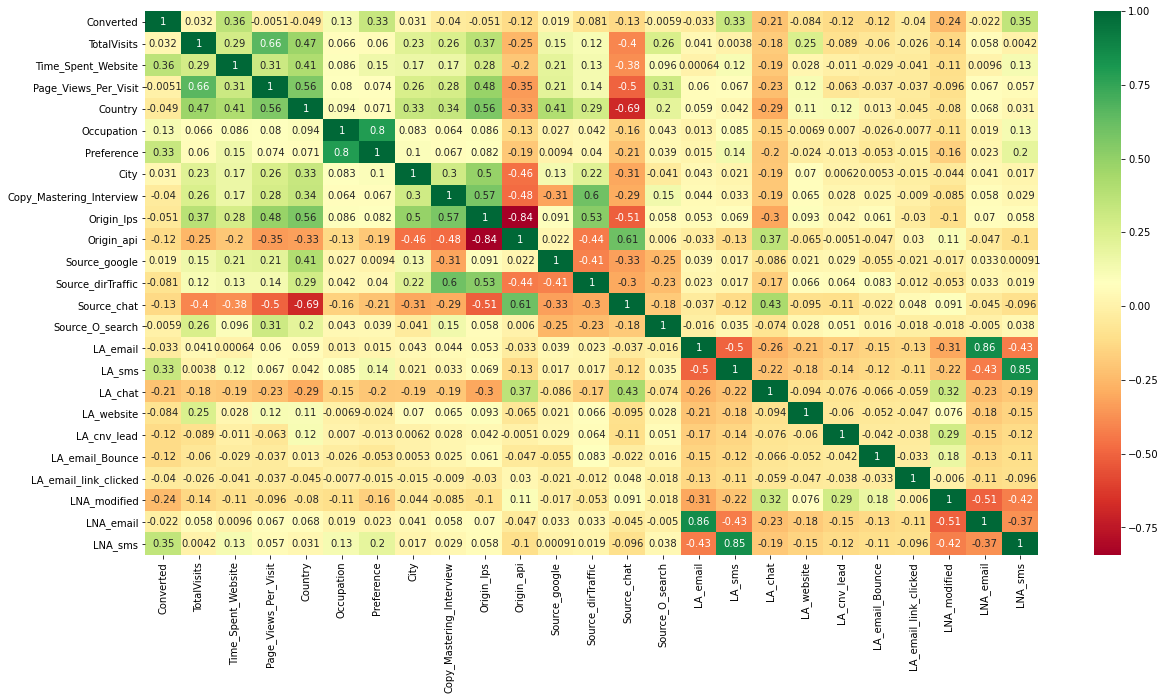

In [392]:
# Now that all the columns are numeric and most of the data corrections done, lets see correlation between them again
plt.figure(figsize = (20,10))   
sns.heatmap(leads.corr(), annot=True, cmap='RdYlGn')
plt.show()

#### There are many variables with high colinearity. Most notable are 'Total Visits' with 'Page View Per Visit' and 'Last Action' Vs 'Last Noticable Action' variables. Dropping 'Page View Per Visit' and dummy variables for 'Last Noticable Action'.

In [393]:
leads.drop(['Page_Views_Per_Visit', 'LNA_modified', 'LNA_email', 'LNA_sms'], axis=1, inplace=True)
leads.head()

,Converted,TotalVisits,Time_Spent_Website,Country,Occupation,Preference,City,Copy_Mastering_Interview,Origin_lps,Origin_api,Source_google,Source_dirTraffic,Source_chat,Source_O_search,LA_email,LA_sms,LA_chat,LA_website,LA_cnv_lead,LA_email_Bounce,LA_email_link_clicked
0,0,0.0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0
1,0,5.0,674,1,1,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0
2,1,2.0,1532,1,0,1,1,1,1,0,0,1,0,0,1,0,0,0,0,0,0
3,0,1.0,305,1,1,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0
4,1,2.0,1428,1,1,1,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0


In [394]:
leads.shape

(9240, 21)

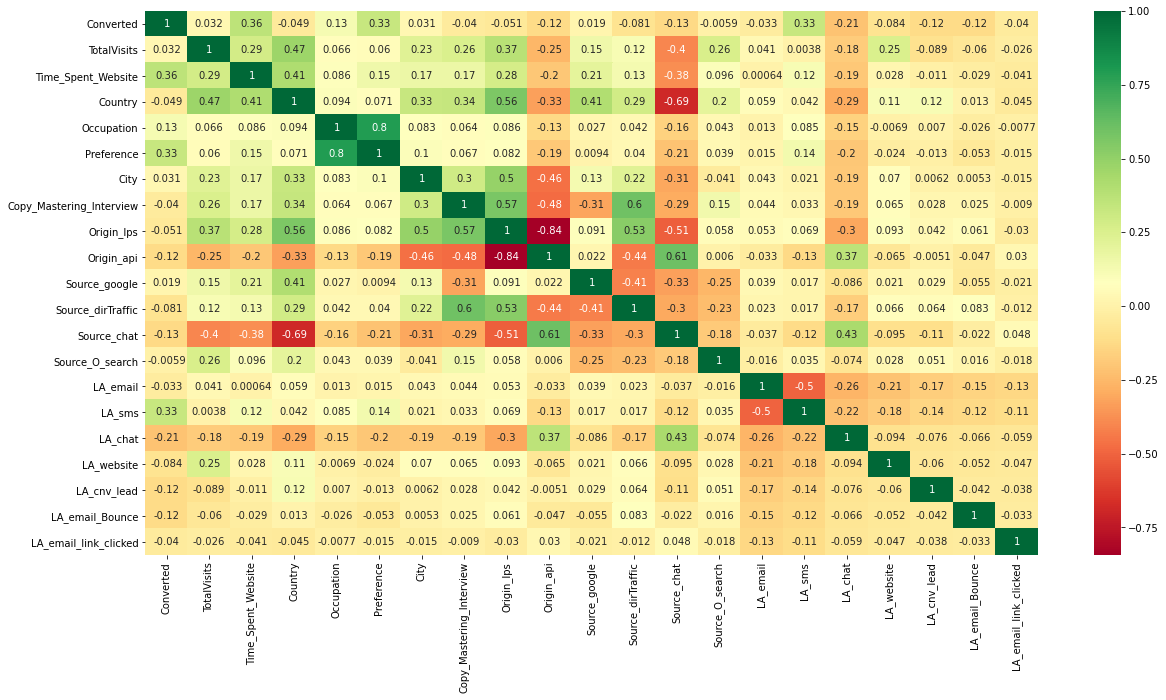

In [395]:
# Checking the matrix again
plt.figure(figsize = (20,10))   
sns.heatmap(leads.corr(), annot=True, cmap='RdYlGn')
plt.show()

### STEP 3 - Test Train Split
- Dividing the DataFrame in X and y where X represents independent variables and y represents the target or dependent variable
- Splitting the data to Train & Test in a 70:30 ration

In [396]:
# defining X for independent variables
X = leads.drop('Converted', axis=1)
X.head()

,TotalVisits,Time_Spent_Website,Country,Occupation,Preference,City,Copy_Mastering_Interview,Origin_lps,Origin_api,Source_google,Source_dirTraffic,Source_chat,Source_O_search,LA_email,LA_sms,LA_chat,LA_website,LA_cnv_lead,LA_email_Bounce,LA_email_link_clicked
0,0.0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0
1,5.0,674,1,1,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0
2,2.0,1532,1,0,1,1,1,1,0,0,1,0,0,1,0,0,0,0,0,0
3,1.0,305,1,1,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0
4,2.0,1428,1,1,1,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0


In [397]:
# target in y variable
y = leads.Converted
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [398]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [399]:
y_train.value_counts(normalize=True)

0    0.618738
1    0.381262
Name: Converted, dtype: float64

##### The Train DF has a nice split of the binary values. No problem related to imbalance.

### STEP 4 - Data Scaling
- scaling the numeric (continuous) columns using Standardisation.Standardisation in techinque to bring all the data into a standard normal distribution with mean 0 and standard deviation 1.

In [400]:
X_train.describe()

,TotalVisits,Time_Spent_Website,Country,Occupation,Preference,City,Copy_Mastering_Interview,Origin_lps,Origin_api,Source_google,Source_dirTraffic,Source_chat,Source_O_search,LA_email,LA_sms,LA_chat,LA_website,LA_cnv_lead,LA_email_Bounce,LA_email_link_clicked
count,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000
mean,3.392703,483.875850,0.701453,0.605133,0.704855,0.346011,0.311843,0.528139,0.387137,0.316636,0.271490,0.190167,0.121058,0.369821,0.300402,0.102195,0.072047,0.046073,0.036333,0.028293
std,3.755734,546.565663,0.457656,0.488860,0.456143,0.475734,0.463282,0.499246,0.487133,0.465200,0.444763,0.392463,0.326219,0.482793,0.458468,0.302929,0.258586,0.209659,0.187131,0.165822
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,246.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.000000,926.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,50.000000,2272.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [401]:
vars_to_scale = ['TotalVisits', 'Time_Spent_Website']

In [402]:
scaler = StandardScaler()

In [403]:
# Scaling the train dataset
X_train[vars_to_scale] = scaler.fit_transform(X_train[vars_to_scale])
X_train.head()

,TotalVisits,Time_Spent_Website,Country,Occupation,Preference,City,Copy_Mastering_Interview,Origin_lps,Origin_api,Source_google,Source_dirTraffic,Source_chat,Source_O_search,LA_email,LA_sms,LA_chat,LA_website,LA_cnv_lead,LA_email_Bounce,LA_email_link_clicked
1871,-0.903409,-0.885371,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0
6795,0.161711,0.005716,1,1,1,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0
3516,0.427991,-0.691418,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0
8105,0.427991,1.365219,1,1,1,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0
3934,-0.903409,-0.885371,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0


In [404]:
# transform the test dataset
X_test[vars_to_scale] = scaler.transform(X_test[vars_to_scale])
X_test.head()

,TotalVisits,Time_Spent_Website,Country,Occupation,Preference,City,Copy_Mastering_Interview,Origin_lps,Origin_api,Source_google,Source_dirTraffic,Source_chat,Source_O_search,LA_email,LA_sms,LA_chat,LA_website,LA_cnv_lead,LA_email_Bounce,LA_email_link_clicked
4269,1.226832,0.964504,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0
2376,-0.903409,-0.885371,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
7766,0.427991,-0.777416,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0
9199,-0.903409,-0.885371,0,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0
4359,-0.903409,-0.885371,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


### STEP 5 - Model Development
- Create a initial model will all the variables
- Creation of a model using the RFE (Recursive Feature Elimination)
- Evaluation & Evolution of the models

In [405]:
X_train.shape

(6468, 20)

In [406]:
X_train_sm = sm.add_constant(X_train)
X_train_sm.head()

,const,TotalVisits,Time_Spent_Website,Country,Occupation,Preference,City,Copy_Mastering_Interview,Origin_lps,Origin_api,Source_google,Source_dirTraffic,Source_chat,Source_O_search,LA_email,LA_sms,LA_chat,LA_website,LA_cnv_lead,LA_email_Bounce,LA_email_link_clicked
1871,1.0,-0.903409,-0.885371,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0
6795,1.0,0.161711,0.005716,1,1,1,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0
3516,1.0,0.427991,-0.691418,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0
8105,1.0,0.427991,1.365219,1,1,1,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0
3934,1.0,-0.903409,-0.885371,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0


In [407]:
# Logistic regression model
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
model = logm1.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2718.2
Date:                Thu, 08 Jul 2021   Deviance:                       5436.5
Time:                        20:29:01   Pearson chi2:                 6.38e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.6065      0.228      2.659      0.008       0.159       1.054
TotalVisits                  0.1693      0.039      4.311      0.000       0.092       0.246
Time_Spent_Website           1.0814      0.040     27.223      0.000       1.004       1.159
Country                     -0.1760      0.159     -1.109      0.268      -0.487       0.135
Occupation                  -1.7404      0.127    -13.752      0.000      -1.988      -1.492
Preference                   2.9294      0.143     20.511      0.000       2.649       3.209
City                         0.1094      0.083      1.320      0.187      -0.053       0.272
Copy_Mastering_Interview    -0.0475      0.104     -0.456      0.648      -0.251       0.156
Origin_lps                  -3.0899      0.347     -8.904      0.000      -3.770      -2.410
Origin_api                  -2.7795      0.342     -8.122      0.000      -3.450      -2.109
Source_google                0.0561      0.279      0.201      0.841      -0.491       0.603
Source_dirTraffic           -0.2637      0.289     -0.913      0.361      -0.830       0.302
Source_chat                  0.9810      0.318      3.080      0.002       0.357       1.605
Source_O_search             -0.1769      0.289     -0.612      0.541      -0.744       0.390
LA_email                     0.3775      0.184      2.048      0.041       0.016       0.739
LA_sms                       1.4572      0.186      7.823      0.000       1.092       1.822
LA_chat                     -1.1159      0.241     -4.637      0.000      -1.588      -0.644
LA_website                  -0.3443      0.225     -1.528      0.127      -0.786       0.097
LA_cnv_lead                 -0.7712      0.275     -2.801      0.005      -1.311      -0.232
LA_email_Bounce             -1.4885      0.337     -4.415      0.000      -2.149      -0.828
LA_email_link_clicked       -0.0801      0.274     -0.292      0.770      -0.617       0.457
============================================================================================
"""

#### As is evident from the above model that there are variables that have high P-value and hence the model is not fit just yet. As a kick start, lets use the RFE approach to pick the initial 13 best varaiables and then work on fine-tuining.

In [408]:
logreg = LogisticRegression()

In [409]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 13)             # running RFE with 13 variables as output
rfe = rfe.fit(X_train, y_train)

In [410]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 5),
 ('Time_Spent_Website', True, 1),
 ('Country', False, 3),
 ('Occupation', True, 1),
 ('Preference', True, 1),
 ('City', False, 6),
 ('Copy_Mastering_Interview', False, 7),
 ('Origin_lps', True, 1),
 ('Origin_api', True, 1),
 ('Source_google', False, 2),
 ('Source_dirTraffic', True, 1),
 ('Source_chat', True, 1),
 ('Source_O_search', True, 1),
 ('LA_email', True, 1),
 ('LA_sms', True, 1),
 ('LA_chat', True, 1),
 ('LA_website', False, 4),
 ('LA_cnv_lead', True, 1),
 ('LA_email_Bounce', True, 1),
 ('LA_email_link_clicked', False, 8)]

In [411]:
# List of columns that made in the model
X_train.columns[rfe.support_]

Index(['Time_Spent_Website', 'Occupation', 'Preference', 'Origin_lps',
       'Origin_api', 'Source_dirTraffic', 'Source_chat', 'Source_O_search',
       'LA_email', 'LA_sms', 'LA_chat', 'LA_cnv_lead', 'LA_email_Bounce'],
      dtype='object')

In [412]:
# List of columns to be dropped
cols_drop = X_train.columns[~rfe.support_]
cols_drop

Index(['TotalVisits', 'Country', 'City', 'Copy_Mastering_Interview',
       'Source_google', 'LA_website', 'LA_email_link_clicked'],
      dtype='object')

In [413]:
# Dropping these columns for X_train, X_train_sm and X_test dataframes so that all three have same structure at any point
# except for the additional column for constant
X_train.drop(cols_drop, axis=1, inplace=True)
X_train_sm.drop(cols_drop, axis=1, inplace=True)
X_test.drop(cols_drop, axis=1, inplace=True)
print (X_train.shape)
print (X_train_sm.shape)
print (X_test.shape)

(6468, 13)
(6468, 14)
(2772, 13)


#### Recreating the above model using statsmodel to get the evaluation stats

In [414]:
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
model = logm2.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2729.0
Date:                Thu, 08 Jul 2021   Deviance:                       5458.1
Time:                        20:29:01   Pearson chi2:                 6.34e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.3953      0.179      2.202      0.028       0.044       0.747
Time_Spent_Website     1.0813      0.039     27.512      0.000       1.004       1.158
Occupation            -1.7283      0.126    -13.706      0.000      -1.975      -1.481
Preference             2.9256      0.142     20.547      0.000       2.647       3.205
Origin_lps            -2.9919      0.160    -18.730      0.000      -3.305      -2.679
Origin_api            -2.7728      0.166    -16.704      0.000      -3.098      -2.447
Source_dirTraffic     -0.3674      0.093     -3.946      0.000      -0.550      -0.185
Source_chat            0.9289      0.123      7.536      0.000       0.687       1.170
Source_O_search       -0.1895      0.110     -1.718      0.086      -0.406       0.027
LA_email               0.4892      0.109      4.506      0.000       0.276       0.702
LA_sms                 1.5545      0.111     13.976      0.000       1.336       1.772
LA_chat               -0.9964      0.187     -5.323      0.000      -1.363      -0.630
LA_cnv_lead           -0.7644      0.228     -3.347      0.001      -1.212      -0.317
LA_email_Bounce       -1.4266      0.300     -4.757      0.000      -2.014      -0.839
======================================================================================
"""

In [415]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Preference,8.94
1,Occupation,7.13
3,Origin_lps,4.99
4,Origin_api,4.27
8,LA_email,3.02
9,LA_sms,2.55
6,Source_chat,2.53
5,Source_dirTraffic,2.16
10,LA_chat,1.87
7,Source_O_search,1.37


In [416]:
# the VIF for Preference is very high and will impact the performance of the model. Dropping it from X_train, X_train_sm
# and X_test dataframes
X_train.drop('Preference', axis=1, inplace=True)
X_train_sm.drop('Preference', axis=1, inplace=True)
X_test.drop('Preference', axis=1, inplace=True)
print (X_train.shape)
print (X_train_sm.shape)
print (X_test.shape)

(6468, 12)
(6468, 13)
(2772, 12)


In [417]:
# Recareating the model
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
model = logm3.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2983.4
Date:                Thu, 08 Jul 2021   Deviance:                       5966.8
Time:                        20:29:01   Pearson chi2:                 6.67e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  1.6733      0.161     10.421      0.000       1.359       1.988
Time_Spent_Website     1.1076      0.038     29.324      0.000       1.034       1.182
Occupation             0.2897      0.067      4.307      0.000       0.158       0.422
Origin_lps            -3.3731      0.155    -21.795      0.000      -3.676      -3.070
Origin_api            -3.2532      0.161    -20.257      0.000      -3.568      -2.938
Source_dirTraffic     -0.3301      0.088     -3.730      0.000      -0.503      -0.157
Source_chat            0.8919      0.117      7.611      0.000       0.662       1.122
Source_O_search       -0.1713      0.105     -1.634      0.102      -0.377       0.034
LA_email               0.5172      0.102      5.046      0.000       0.316       0.718
LA_sms                 1.5500      0.105     14.740      0.000       1.344       1.756
LA_chat               -1.0319      0.178     -5.791      0.000      -1.381      -0.683
LA_cnv_lead           -0.7183      0.219     -3.273      0.001      -1.148      -0.288
LA_email_Bounce       -1.5429      0.298     -5.177      0.000      -2.127      -0.959
======================================================================================
"""

In [418]:
# Checking the VIF
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Origin_lps,4.96
3,Origin_api,4.26
7,LA_email,2.88
5,Source_chat,2.52
1,Occupation,2.37
8,LA_sms,2.36
4,Source_dirTraffic,2.16
9,LA_chat,1.85
6,Source_O_search,1.37
10,LA_cnv_lead,1.28


In [419]:
# Source_O_search has high P-value making it unsuitable for the model Dropping it from the 3 DF's.
X_train.drop('Source_O_search', axis=1, inplace=True)
X_train_sm.drop('Source_O_search', axis=1, inplace=True)
X_test.drop('Source_O_search', axis=1, inplace=True)
print (X_train.shape)
print (X_train_sm.shape)
print (X_test.shape)

(6468, 11)
(6468, 12)
(2772, 11)


In [420]:
# Recreating the model
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
model = logm4.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6456
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2984.7
Date:                Thu, 08 Jul 2021   Deviance:                       5969.4
Time:                        20:29:02   Pearson chi2:                 6.67e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  1.6764      0.161     10.441      0.000       1.362       1.991
Time_Spent_Website     1.1084      0.038     29.362      0.000       1.034       1.182
Occupation             0.2877      0.067      4.278      0.000       0.156       0.420
Origin_lps            -3.4205      0.152    -22.482      0.000      -3.719      -3.122
Origin_api            -3.2979      0.158    -20.823      0.000      -3.608      -2.988
Source_dirTraffic     -0.2833      0.084     -3.382      0.001      -0.447      -0.119
Source_chat            0.9360      0.114      8.192      0.000       0.712       1.160
LA_email               0.5179      0.102      5.054      0.000       0.317       0.719
LA_sms                 1.5462      0.105     14.715      0.000       1.340       1.752
LA_chat               -1.0314      0.178     -5.787      0.000      -1.381      -0.682
LA_cnv_lead           -0.7249      0.219     -3.305      0.001      -1.155      -0.295
LA_email_Bounce       -1.5505      0.298     -5.204      0.000      -2.134      -0.966
======================================================================================
"""

In [421]:
# Checking the VIF
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Origin_lps,4.50
3,Origin_api,3.99
6,LA_email,2.88
5,Source_chat,2.39
1,Occupation,2.37
7,LA_sms,2.36
4,Source_dirTraffic,1.92
8,LA_chat,1.85
9,LA_cnv_lead,1.28
0,Time_Spent_Website,1.21


#### The above seems to be a stable modle to start with. Lets predict the probability to Convert on the train dataset and check other stats

In [422]:
# Getting the predicted values on the train set
y_train_pred = model.predict(X_train_sm)
y_train_pred.head()

1871    0.297074
6795    0.228751
3516    0.343827
8105    0.832445
3934    0.297074
dtype: float64

In [423]:
y_train_pred.shape

(6468,)

In [424]:
#y_train_pred = y_train_pred.values.reshape(-1)
#y_train_pred.shape

In [425]:
#
y_train_pred_final = pd.DataFrame({'Lead_ID': y_train.index, 'Converted':y_train.values, 'Convert_Prob':y_train_pred})
y_train_pred_final.reset_index(drop=True, inplace=True)
y_train_pred_final.head()

,Lead_ID,Converted,Convert_Prob
0,1871,0,0.297074
1,6795,0,0.228751
2,3516,0,0.343827
3,8105,0,0.832445
4,3934,0,0.297074


In [426]:
y_train_pred_final['Predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Lead_ID,Converted,Convert_Prob,Predicted
0,1871,0,0.297074,0
1,6795,0,0.228751,0
2,3516,0,0.343827,0
3,8105,0,0.832445,1
4,3934,0,0.297074,0


#### Building the confusion matrix and calculating various metrices

In [427]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted)
print(confusion)

[[3493  509]
 [ 831 1635]]


In [428]:
# Defining True negative, true positive, false positive, false negative
TN = confusion[0,0]
TP = confusion[1,1]
FP = confusion[0,1]
FN = confusion[1,0]

In [429]:
# Accuracy
accuracy = (TN + TP)/ (TN + TP + FP + FN)
accuracy

0.79282622139765

In [430]:
# Calculating accuracy using the standard method available in the metrics library
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.79282622139765


In [431]:
# sensitivity - Actual yes correctly predicted/ total number of yes
# specificity - actual no's correctly predicted/ total number of no's
sens = TP/ (FN + TP)
spec = TN/ (TN + FP)
print ('Sensitivity is {} & Specificity is {}'.format(sens, spec))

Sensitivity is 0.6630170316301703 & Specificity is 0.8728135932033984


In [432]:
# precision - Probability that a predicted 'Yes' is actually a 'Yes'
# recall - Probability that an actual 'Yes' case is predicted correctly
prec = TP/ (TP + FP)
recall = TP/ (TP + FN)
print ('Precision is {} & Recall is {}'.format(prec, recall))

Precision is 0.7625932835820896 & Recall is 0.6630170316301703


### STEP 6 - Plotting the ROC Curve

In [433]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [434]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Convert_Prob, drop_intermediate = False )

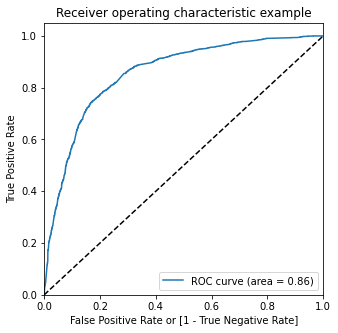

In [435]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Convert_Prob)

### STEP 7 - Finding the optimal Cutoff Point
- Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [436]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Lead_ID,Converted,Convert_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1871,0,0.297074,0,1,1,1,0,0,0,0,0,0,0
1,6795,0,0.228751,0,1,1,1,0,0,0,0,0,0,0
2,3516,0,0.343827,0,1,1,1,1,0,0,0,0,0,0
3,8105,0,0.832445,1,1,1,1,1,1,1,1,1,1,0
4,3934,0,0.297074,0,1,1,1,0,0,0,0,0,0,0


In [437]:
# Printing confusion matrix at various cutoff
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sens','spec', 'prec', 'recall'])
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    TN = cm[0,0]
    TP = cm[1,1]
    FP = cm[0,1]
    FN = cm[1,0]
    accuracy = (TN + TP)/ (TN + TP + FP + FN)
    sens = TP/ (FN + TP)
    spec = TN/ (TN + FP)
    prec = TP/ (TP + FP)
    recall = TP/ (TP + FN)
    cutoff_df.loc[i] =[ i ,accuracy,sens,spec, prec, recall]
print(cutoff_df)

     prob  accuracy      sens      spec      prec    recall
0.0   0.0  0.381262  1.000000  0.000000  0.381262  1.000000
0.1   0.1  0.565399  0.973642  0.313843  0.466485  0.973642
0.2   0.2  0.699134  0.917275  0.564718  0.564935  0.917275
0.3   0.3  0.772882  0.820357  0.743628  0.663496  0.820357
0.4   0.4  0.796073  0.749797  0.824588  0.724814  0.749797
0.5   0.5  0.792826  0.663017  0.872814  0.762593  0.663017
0.6   0.6  0.769171  0.544201  0.907796  0.784337  0.544201
0.7   0.7  0.746444  0.449311  0.929535  0.797122  0.449311
0.8   0.8  0.717378  0.322384  0.960770  0.835084  0.322384
0.9   0.9  0.674242  0.167072  0.986757  0.886022  0.167072


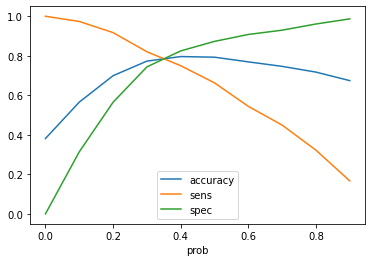

In [438]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sens','spec'])
plt.show()

#### Based on the above graph and the table, 0.3 seems to be the best possible cutoff point where the trade-off between the three metrices seems best.
#### Logically also, for our case it seems better to predict most of the "yes" cases at the cost of picking some incorrect "yes". This will help business to roll-out the best strategy to convert the maximum number of cases.

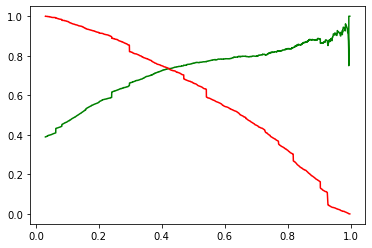

In [439]:
# Now at this point, lets check the graph of precision and recall
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Convert_Prob)
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

#### As per the above graph the best trade-off point for precision and recall is 0.4. However, very specific to our business problem is to predict max number of "Yes" or (Converted) without much hampering the accuracy. This is happening at cutoff = 0.3. Hence, the cutoff of 0.3 should be finalized. Also, Sensitivity Vs Specificity seems better matrix for our case.
     prob  accuracy      sens      spec
      0.0  0.381262  1.000000  0.000000
      0.1  0.565399  0.973642  0.313843
      0.2  0.699134  0.917275  0.564718
      0.3  0.772882  0.820357  0.743628
      0.4  0.796073  0.749797  0.824588
      0.5  0.792826  0.663017  0.872814


#### From the train DF, the following can be explained to X Education:-
- During the normal part of the year cut-off of 0.3 is suggested. It provides the best trade-off between accuracy and sensitivity. At this cut-off the model will predict 82% conversions correctly with accuracy of 77%.
- During the 2 months window when X Education is trying to convert maximum they should compromise with accuracy and select a cutoff of 0.2. At this cut-off they will be able to predict 91% of conversions with 69.9% accuracy.
- During the period when X Education has already met the target they should tighten the cut-off at 0.4. At this point, the model will be able to predict 74% conversions with 79% accuracy.

#### Updating the final DF extracted from train DF with the required values

In [440]:
y_train_pred_final.columns

Index([     'Lead_ID',    'Converted', 'Convert_Prob',    'Predicted',
                  0.0,            0.1,            0.2,            0.3,
                  0.4,            0.5,            0.6,            0.7,
                  0.8,            0.9],
      dtype='object')

In [441]:
# Updating the table with the final cut-off at 0.3
y_train_pred_final.drop(['Predicted', 0.0, 0.1, 0.2, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9], axis=1, inplace=True)
y_train_pred_final.rename({0.3:'Predicted'}, axis=1, inplace=True)
y_train_pred_final.head()

,Lead_ID,Converted,Convert_Prob,Predicted
0,1871,0,0.297074,0
1,6795,0,0.228751,0
2,3516,0,0.343827,1
3,8105,0,0.832445,1
4,3934,0,0.297074,0


In [442]:
# Introducing a lead score field. Higher the value, higher is the chance of conversion
y_train_pred_final['Lead_Score'] = round (y_train_pred_final.Convert_Prob * 100)
y_train_pred_final.head()

,Lead_ID,Converted,Convert_Prob,Predicted,Lead_Score
0,1871,0,0.297074,0,30.0
1,6795,0,0.228751,0,23.0
2,3516,0,0.343827,1,34.0
3,8105,0,0.832445,1,83.0
4,3934,0,0.297074,0,30.0


In [443]:
# reconfirming the metrices
cm = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted)
TN = cm[0,0]
TP = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]
accuracy = (TN + TP)/ (TN + TP + FP + FN)
print ('Accuracy is ', accuracy)
sens = TP/ (FN + TP)
spec = TN/ (TN + FP)
print ('Sensitivity is {} & Specificity is {}'.format(sens, spec))
prec = TP/ (TP + FP)
recall = TP/ (TP + FN)
print ('Precision is {} & Recall is {}'.format(prec, recall))
accr_p = round (accuracy * 100, 2)
sens_p = round (sens * 100, 2)
print ('*' * 95)
print ('With an accuracy of {}% the model can predict {}% conversions correctly on the train DF'.format(accr_p, sens_p))
print ('*' * 95)

Accuracy is  0.7728818800247371
Sensitivity is 0.8203568532035685 & Specificity is 0.7436281859070465
Precision is 0.6634962282715644 & Recall is 0.8203568532035685
***********************************************************************************************
With an accuracy of 77.29% the model can predict 82.04% conversions correctly on the train DF
***********************************************************************************************


### STEP 8 - Predictions against Test DF

In [444]:
X_test.head()

,Time_Spent_Website,Occupation,Origin_lps,Origin_api,Source_dirTraffic,Source_chat,LA_email,LA_sms,LA_chat,LA_cnv_lead,LA_email_Bounce
4269,0.964504,0,0,1,1,0,0,1,0,0,0
2376,-0.885371,1,0,0,0,0,0,1,0,0,0
7766,-0.777416,0,0,1,0,0,0,0,0,0,0
9199,-0.885371,1,0,1,0,1,0,0,1,0,0
4359,-0.885371,1,0,0,0,0,1,0,0,0,0


In [445]:
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,Time_Spent_Website,Occupation,Origin_lps,Origin_api,Source_dirTraffic,Source_chat,LA_email,LA_sms,LA_chat,LA_cnv_lead,LA_email_Bounce
4269,1.0,0.964504,0,0,1,1,0,0,1,0,0,0
2376,1.0,-0.885371,1,0,0,0,0,0,1,0,0,0
7766,1.0,-0.777416,0,0,1,0,0,0,0,0,0,0
9199,1.0,-0.885371,1,0,1,0,1,0,0,1,0,0
4359,1.0,-0.885371,1,0,0,0,0,1,0,0,0,0


In [446]:
# Getting the predicted values on the test set
y_test_pred = model.predict(X_test_sm)
y_test_pred.head()

4269    0.670511
2376    0.926147
7766    0.077044
9199    0.082368
4359    0.817679
dtype: float64

In [447]:
y_test_pred_final = pd.DataFrame({'Lead_ID': y_test.index, 'Converted':y_test.values, 'Convert_Prob':y_test_pred})
y_test_pred_final.reset_index(drop=True, inplace=True)
y_test_pred_final.head()

,Lead_ID,Converted,Convert_Prob
0,4269,1,0.670511
1,2376,1,0.926147
2,7766,1,0.077044
3,9199,0,0.082368
4,4359,1,0.817679


In [448]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_test_pred_final[i]= y_test_pred_final.Convert_Prob.map(lambda x: 1 if x > i else 0)
y_test_pred_final.head()

,Lead_ID,Converted,Convert_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,4269,1,0.670511,1,1,1,1,1,1,1,0,0,0
1,2376,1,0.926147,1,1,1,1,1,1,1,1,1,1
2,7766,1,0.077044,1,0,0,0,0,0,0,0,0,0
3,9199,0,0.082368,1,0,0,0,0,0,0,0,0,0
4,4359,1,0.817679,1,1,1,1,1,1,1,1,1,0


In [449]:
# Printing confusion matrix at various cutoff
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sens','spec'])
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm = metrics.confusion_matrix(y_test_pred_final.Converted, y_test_pred_final[i] )
    TN = cm[0,0]
    TP = cm[1,1]
    FP = cm[0,1]
    FN = cm[1,0]
    accuracy = (TN + TP)/ (TN + TP + FP + FN)
    sens = TP/ (FN + TP)
    spec = TN/ (TN + FP)
    cutoff_df.loc[i] =[ i ,accuracy,sens,spec]
print(cutoff_df)

     prob  accuracy      sens      spec
0.0   0.0  0.395022  1.000000  0.000000
0.1   0.1  0.579004  0.972603  0.322004
0.2   0.2  0.707792  0.921461  0.568277
0.3   0.3  0.775253  0.825571  0.742397
0.4   0.4  0.791847  0.746119  0.821705
0.5   0.5  0.786797  0.653881  0.873584
0.6   0.6  0.763709  0.528767  0.917114
0.7   0.7  0.743146  0.433790  0.945140
0.8   0.8  0.703824  0.302283  0.966011
0.9   0.9  0.655123  0.146119  0.987478


#### From the above stats, we can conclude that on unseen data the model will perform in the following manner:-
- During the normal part of the year cut-off of 0.3 is suggested. It provides the best trade-off between accuracy and sensitivity. At this cut-off the model will predict 82% conversions correctly with accuracy of 77%.
- During the 2 months window when X Education is trying to convert maximum they should compromise with accuracy and select a cutoff of 0.2. At this cut-off they will be able to predict 92% of conversions with 70% accuracy.
- During the period when X Education has already met the target they should tighten the cut-off at 0.4. At this point, the model will be able to predict 74% conversions with 79% accuracy.

In [450]:
# Since the regular cutoff is 0.3, moving with it for rest of the stats:-
y_test_pred_final.drop([0.0, 0.1, 0.2, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9], axis=1, inplace=True)
y_test_pred_final.rename({0.3:'Predicted'}, axis=1, inplace=True)
y_test_pred_final.head()

,Lead_ID,Converted,Convert_Prob,Predicted
0,4269,1,0.670511,1
1,2376,1,0.926147,1
2,7766,1,0.077044,0
3,9199,0,0.082368,0
4,4359,1,0.817679,1


In [451]:
# Introducing a lead score field. Higher the value, higher is the chance of conversion
y_test_pred_final['Lead_Score'] = round (y_test_pred_final.Convert_Prob * 100)
y_test_pred_final.head()

,Lead_ID,Converted,Convert_Prob,Predicted,Lead_Score
0,4269,1,0.670511,1,67.0
1,2376,1,0.926147,1,93.0
2,7766,1,0.077044,0,8.0
3,9199,0,0.082368,0,8.0
4,4359,1,0.817679,1,82.0


In [452]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_test_pred_final.Converted, y_test_pred_final.Predicted)
print(confusion)

[[1245  432]
 [ 191  904]]


In [453]:
# Defining True negative, true positive, false positive, false negative
TN = confusion[0,0]
TP = confusion[1,1]
FP = confusion[0,1]
FN = confusion[1,0]

In [454]:
accuracy = (TN + TP)/ (TN + TP + FP + FN)
print ('accuracy is', accuracy)
sens = TP/ (FN + TP)
spec = TN/ (TN + FP)
print ('Sensitivity is {} & Specificity is {}'.format(sens, spec))
prec = TP/ (TP + FP)
recall = TP/ (TP + FN)
print ('Precision is {} & Recall is {}'.format(prec, recall))
accr_p = round (accuracy * 100, 2)
sens_p = round (sens * 100, 2)
print ('*' * 95)
print ('With an accuracy of {}% the model can predict {}% conversions correctly on the test DF'.format(accr_p, sens_p))
print ('*' * 95)

accuracy is 0.7752525252525253
Sensitivity is 0.8255707762557077 & Specificity is 0.7423971377459749
Precision is 0.6766467065868264 & Recall is 0.8255707762557077
***********************************************************************************************
With an accuracy of 77.53% the model can predict 82.56% conversions correctly on the test DF
***********************************************************************************************
